# Transformada de Fourier para Análise de Áudio

## Objetivos
Ao fim desta iteração, o aluno será capaz de:

1. Utilizar a Transformada Discreta de Fourier (TDF) para analisar sinais de áudio, entendendo suas limitações.
1. Utilizar espectrogramas para análise de áudio, manipular os parâmetros de um espectrograma de forma a evidenciar eventos acústicos.


## Pré-requisitos
Neste ponto do curso, o estudante deverá ter tranquilidade com os seguintes conceitos:

### 1) Séries de Fourier são modelos capazes de descrever algumas propriedades de sons harmônicos
Como sabemos desde os experimentos de Helmholtz, as oscilações relacionadas à sensação de sons harmônicos (tais como os emitidos por cordas vibrantes e tubos de ressonância) podem ser descritas por uma série de cossenóides cujas frequências são múltiplas de uma fundamental $f_0$, na forma:
$$x(t) = \sum_{m=1}^M a_m \cos (2 \pi m f_0 t + \phi_m),$$
onde:
* os coeficientes $\phi_m$ se relacionam à fase de cada cossenóide, e têm pouco impacto perceptual;
* os coeficientes $a_m$ se relacionam à amplitude de cada cossenóide, e são grandemente relacionadas ao *timbre* percebido.

### 2) Qualquer sinal - periódico ou não - pode ser representado por sua Transformada de Fourier
A Transformada de Fourier de um sinal transporta sua representação no domínio do tempo para o domínio da frequência. Um sinal $x(t)$ no domínio do tempo pode ser representado, no domínio da frequência, por um sinal $X(f)$, tal que:
$$X(f) = \int x(t) e^{j 2 \pi f t} dt,$$
onde:
* $j$ é a unidade complexa ($j^2 = -1$),
* $t$ é a variável, em segundos, relacionada ao domínio do tempo
* $f$ é a variável, em Hertz, relacionada ao domínio da frequência, e
* A exponencial complexa se relaciona a senóides e cossenóides através da Equação de Euler: $e ^ j\theta = \cos(\theta) + j \sin(\theta)$


### 3) Sinais no domínio do tempo podem ser amostrados, gerando uma série numérica correpondente
Quando um sinal $x(t)$ é amostrado com frequência de amostragem $f_s$, geramos uma série numérica $x[n]$, onde $n$ é o número (índice) de uma amostra, na forma:
$$x[n] = x(\frac{n}{f_s}).$$

Neste caso, sabemos que a amostra $x[n]$ representa a magnitude (ou, simplesmente, o valor medido) do sinal $x(t)$ no instante $t = \frac{n}{f_s}$. Também, sabemos que $x[n]$ contem toda a informação de $x(t)$, sem distorções, se a frequência de amostragem $f_s$ for superior ao dobro da maior frequência utilizada para representar o sinal em sua Transformada de Fourier. Por fim, sabemos que, nessas condições, o sinal $x[n]$ pode ser sintetizado novamente (usando uma placa de som, por exemplo) de forma a recuperar o sinal contínuo $x(t)$.

### 4) Sinais discretos podem ser representados no domínio da frequência por sua Transformada Discreta de Fourier
A Transformada Discreta de Fourier (TDF) $X[k]$ de um sinal discreto $x[n]$ é calculada por:
$$X[k] = \sum_{n=0}^{N-1} x[n] e^{\frac{-j 2 \pi k n}{N}},$$
onde:
* $N$ é  número de amostras tomadas para o cálculo da TDF,
* $n$ é o índice da sequência numérica no domínio do tempo discreto e varia de $0$ até $N-1$
* $k$ é o índice da sequência numérica no domínio da frequência, e varia de $0$ até $N-1$

Se a condição de Nyquist for satisfeita, sabemos que o elemento $X[k]$ é uma amostra da Transformada de Fourier de $x(t)$ para a frequência $f = f_s \frac{k}{N}$.


## Sinais estacionários

Inicialmente, devemos desenvolver algum traquejo sobre o que significa "domínio do tempo" e "domínio da frequência". Para isso, vamos emular a amostragem de um sinal ideal $\cos(2 \pi f t)$ e então operar sobre ele.

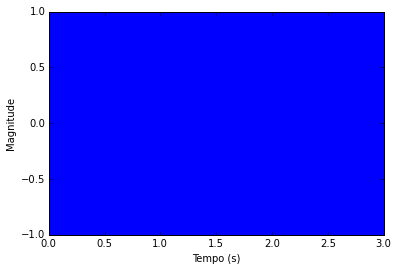

In [104]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fs = 44100
T = 3 # segundos
N = fs*T # numero de amostras do sinal

f = 1000 # Frequencia da senoide

t = np.linspace(0, T, N) # Aqui, defino os instantes de tempo em que vou amostrar o sinal
x = np.cos(2 * np.pi * f * t)

plt.plot(t,x)
plt.xlabel('Tempo (s)')
plt.ylabel('Magnitude')
plt.show()

Verificamos que nossa figura não mostra informações úteis. O que aconteceu é que, nesse pequeno espaço de tela, estão mostrados $f_s \times T$ pontos de dados, que por sua vez estão ligados por linhas que vêm do processo de desenho. Assim, para visualizar nosso sinal $x[n]$, é preciso delimitar um intervalo pequeno de índices que gostaríamos de mostrar:

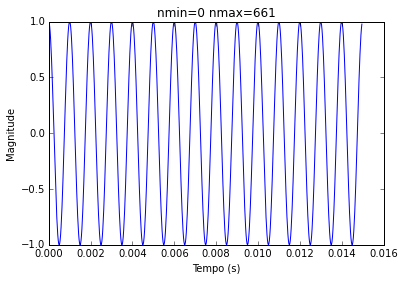

In [105]:
# Definirei os indices maximo e minimo como uma funcao de instantes de tempo marcados em segundos
# mantendo o significado fisico das minhas escolhas
tmax = 0.015 # Segundos
tmin = 0. # Segundos

# Conversao para indices:
nmax = int(tmax * fs) # O arredondamento evita que nmax e nmin tenham valores fracionarios
nmin = int(tmin * fs)

# Novo desenho:
plt.plot(t[nmin:nmax], x[nmin:nmax]) # x[a:b] é um vetor com os elementos de x de índices a ate b-1
plt.title('nmin='+str(nmin)+' nmax='+str(nmax))
plt.xlabel('Tempo (s)')
plt.ylabel('Magnitude')
plt.show()

De nossas premissas, podemos esperar que a Transformada Discreta de Fourier (TDF) de nosso sinal $x[n]$ apresentará um pico de magnitude no índice $k$ correspondente à frequência de nosso sinal. O pacote numpy já implementa a TDF através do algoritmo FFT (*Fast Fourier Transform*). Assim, temos:

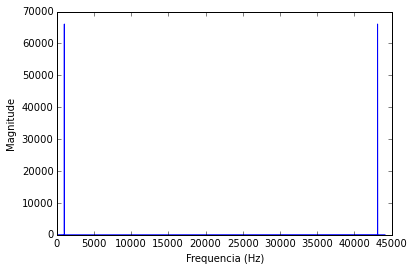

In [106]:
y = np.fft.fft(x) # Calculamos a DFT com apenas uma linha de código

k = np.linspace(0, len(x), len(x)) # Valores de k
freq = fs * k / len(x) # Aqui, determino a frequência relacionada a cada valor de k

plt.plot(freq, np.abs(y)) # Vou desenhar apenas o módulo de y, descartando a fase
plt.xlabel('Frequencia (Hz)')
plt.ylabel('Magnitude')
plt.show()

Neste gráfico, é possível visualizar a simetria da DFT ao redor da frequência de Nyquist ($\frac{1}{2}f_s$). Porém, ele apresenta o mesmo problema que o primeiro gráfico no domínio do tempo: por mostrar muitos pontos de dados, é difícil de visualizar. Vamos adotar uma solução análoga à do domínio do tempo e cercar as freuquências que gostaríamos de representar:

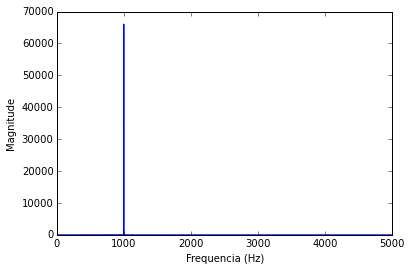

In [107]:
fmax = 5000 # Hz
fmin = 0

kmax = fmax * len(x)/fs
kmin = fmin * len(x)/fs

plt.plot(freq[kmin:kmax], np.abs(y)[kmin:kmax]) # Vou desenhar apenas o módulo de y, descartando a fase
plt.xlabel('Frequencia (Hz)')
plt.ylabel('Magnitude')
plt.show()

Então, como esperávamos, vemos um pico de magnitude na DFT no índice relacionado à frequência de nossa cossenóide.

Uma característica interessante da DFT é que ela permite visualizar sinais que são somas de diferentes cossenóides, evidenciando as magnitudes dessas mesmas cossenóides:

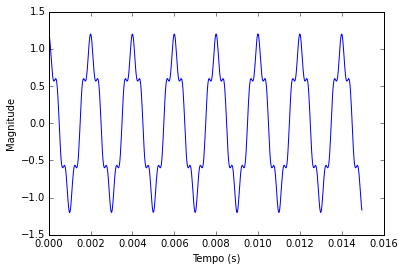

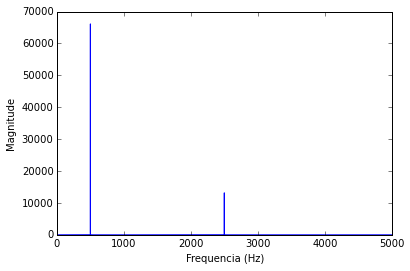

In [108]:
f1 = 500
f2 = 2500

a1 = 1.0
a2 = 0.2

xs = (a1 * np.cos(2 * np.pi * f1 * t)) + (a2 * np.cos(2 * np.pi * f2 * t))
ys = np.fft.fft(xs)

plt.plot(t[nmin:nmax], xs[nmin:nmax])
plt.xlabel('Tempo (s)')
plt.ylabel('Magnitude')
plt.show()

plt.plot(freq[kmin:kmax], np.abs(ys)[kmin:kmax])
plt.xlabel('Frequencia (Hz)')
plt.ylabel('Magnitude')
plt.show()

## Sinais não-estacionários

Nos exemplos acima, utilizamos apenas sinais que permanecem constantes no tempo. Vejamos o que acontece num outro caso. Vamos supor um sinal criado pela concatenação de $x[n]$, tal qual definido no primeiro exemplo, e do sinal $x_s[n]$, tal qual definido no segundo exemplo. Nesse caso, geraremos o sinal $x_c[n] = [x[n], x_s[n]]$:

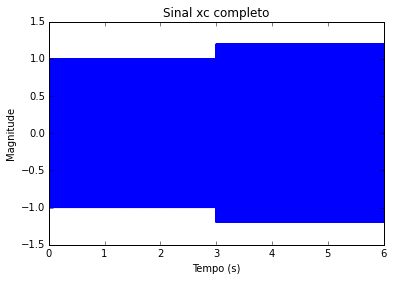

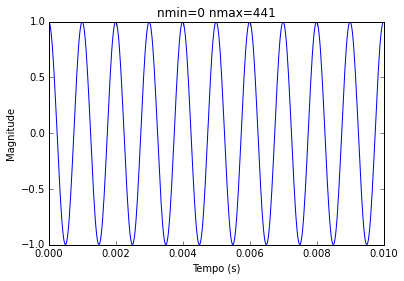

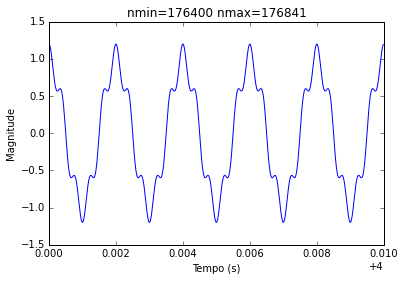

In [109]:
tc = np.linspace(0, T*2, N*2)
xc = np.hstack( (x, xs) )

# Podemos desenhar a primeira metade e a segunda metade do sinal em graficos diferentes:
tmin1 = 0
tmax1 = 0.01

tmin2 = 4
tmax2 = 4.01

# Conversao para indices:
nmax1 = int(tmax1 * fs)
nmin1 = int(tmin1 * fs)

nmax2 = int(tmax2 * fs)
nmin2 = int(tmin2 * fs)


plt.plot(tc, xc)
plt.title('Sinal xc completo')
plt.xlabel('Tempo (s)')
plt.ylabel('Magnitude')
plt.show()


plt.plot(tc[nmin1:nmax1], xc[nmin1:nmax1])
plt.title('nmin='+str(nmin1)+' nmax='+str(nmax1))
plt.xlabel('Tempo (s)')
plt.ylabel('Magnitude')
plt.show()

plt.plot(tc[nmin2:nmax2], xc[nmin2:nmax2])
plt.title('nmin='+str(nmin2)+' nmax='+str(nmax2))
plt.xlabel('Tempo (s)')
plt.ylabel('Magnitude')
plt.show()

Como esperávamos, podemos visualizar:
1. Na forma de onda do sinal completo, parece haver uma "quebra" no ponto em que criamos a junção entre os dois sinais de entrada;
1. Ao expandir a primeira metade do sinal, é possível visualizar a forma de onda de $x[n]$
1. Da mesma forma, na segunda metade é possível visualizar a forma de onda de $x_s[n]$.

Vamos agora calcular a TDF de $x_c[n]$:

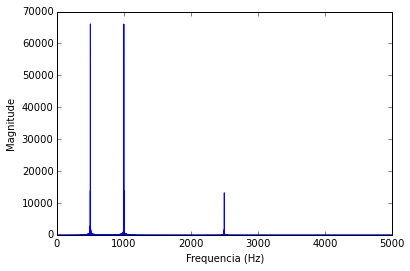

In [110]:
yc = np.fft.fft(xc)

k2 = np.linspace(0, len(xc), len(xc)) # Veja que o mapeamento de valores de k muda, porque o tamanho da TDF mudou.
freq2 = fs * k2 / len(xc) # Aqui, determino a frequência relacionada a cada valor de k

kmax2 = fmax * len(xc)/fs
kmin2 = fmin * len(xc)/fs

plt.plot(freq2[kmin2:kmax2], np.abs(yc)[kmin2:kmax2])
plt.xlabel('Frequencia (Hz)')
plt.ylabel('Magnitude')
plt.show()

Verificamos que essa manifestação se parece com a soma das TDFs de $x[n]$ e de $x_s[n]$.

Assim, verificamos que a TDF é uma ferramenta importante para salientar informação no *domínio da frequência*, embora prejudique a visualização de informações no *domínio do tempo*.

## Resolução no domínio do tempo

Uma solução para o problema de resolução no tempo, em nosso caso, é calcular duas TDFs: uma para a primeira metade do sinal e outra para a segunda metade. Assim, teríamos:

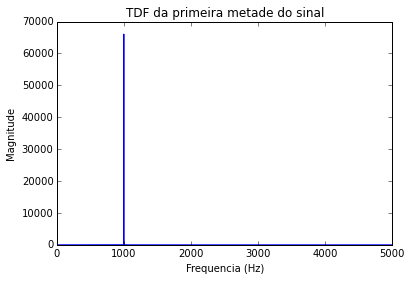

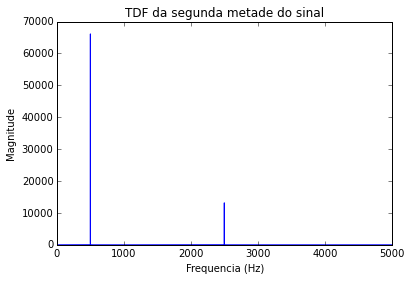

In [111]:
yc1 = np.fft.fft(xc[0:N])
yc2 = np.fft.fft(xc[N:2*N])

k3 = np.linspace(0, len(yc1), len(yc1)) # Veja que o mapeamento de valores de k muda, porque o tamanho da TDF mudou.
freq3 = fs * k3 / len(yc1) # Aqui, determino a frequência relacionada a cada valor de k

kmax3 = fmax * len(yc1)/fs
kmin3 = fmin * len(yc2)/fs

plt.plot(freq3[kmin3:kmax3], np.abs(yc1)[kmin3:kmax3])
plt.title('TDF da primeira metade do sinal')
plt.xlabel('Frequencia (Hz)')
plt.ylabel('Magnitude')
plt.show()

plt.plot(freq3[kmin3:kmax3], np.abs(yc2)[kmin3:kmax3])
plt.title('TDF da segunda metade do sinal')
plt.xlabel('Frequencia (Hz)')
plt.ylabel('Magnitude')
plt.show()

Nesse caso, o que fizemos foi calcular a TDF em um intervalo de tempo curto. Neste momento, devemos estar tranquilos com a percepção de que a *resolução no domínio do tempo* foi ampliada.

Porém, verificamos que acontece um fenômeno interessante ao tomarmos uma TDF com menos pontos - e, portanto, com maior resolução no domínio do tempo. Neste caso, podemos calcular imediatamente que o número de pontos que representam o domínio da frequência também se reduz, proporcionalmente. Isso pode tornar mais difícil identificar dois componentes de frequência muito próximos.

Vamos modelar matematicamente essa resolução, e mostraremos que somente podemos reduzir a quantidade de pontos de nossa TDF dentro de limites que dependem do conteúdo espectral que desejamos visualizar.

## Resolução no domínio da frequência

A seguir, conduzo um raciocínio que é bem conhecido, e mostrado com mais rigor matemático em diversas outras fontes. Esse raciocínio é retomado e, a seguir, demonstrado.

1. Sabemos que a Transformada de Fourier de um sinal contínuo é calculada dentro de limites infinitos.
1. Também, sabemos que a Transformada de Fourier da multiplicação de dois sinais $x_1(t)x_2(t)$ é igual à convolução de seus espectros $X_1(f)*X_2(f)$.
1. Portanto, ao multiplicar um sinal cossenoidal $\cos(2 \pi f_0 t)$ por uma janela retangular (que tem valor $1$ dentro de limites $t0$ e $t1$ conhecidos de tempo e valor $0$ fora desses limites), temos um sinal cujo espectro resultante será a convolução de um impulso $\delta(f-f_0)$ no domínio da frequência com uma função sampling $s(f,t0,t1)$ , caracterizada por um lóbulo central e uma série de lóbulos laterais adjacentes.
1. Esse resultado é a própria função sampling, deslocada de $f_0$ Hz: $s(f-f_0, t0, t1)$.
1. No caso da janela retangular, a largura do lóbulo coincide com a diferença de frequência relacionada a dois coeficientes adjacentes da TDF.
1. Podemos visualizar o formato da função sampling e os efeitos de seu deslocamento no tempo utilizando os seguintes procedimentos:
 1. Aplicar uma janela suficientemente curta sobre um sinal cossenoidal
 1. Utilizar escala logaritmica no eixo vertical, evitando que os coeficientes
 1. Artificialmente, adicionar zeros ao final do sinal multiplicado (essa técnica se chama *zero-padding*), de forma a forçar a existência de mais amostras no domínio da frequência.

Assim, temos:

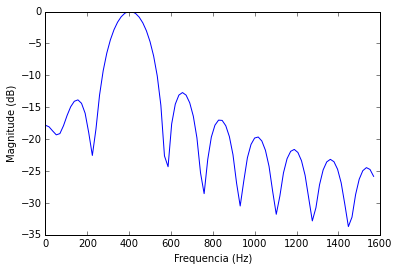

In [112]:
# Este codigo sobrepoe as variaveis definidas acima. Para voltar, sera preciso rodar tudo novamente.

fs = 44100.
N = 256
zeros = 10 # O sinal recebera zeros ate atingir o tamanho zeros * N
f0 = 400

t = np.linspace(0, N/fs, N)
x = np.cos(2 * np.pi * f0 * t)
y = np.fft.fft(x, N*zeros) # A janela retangular eh definida implicitamente, neste caso.

freq = np.linspace(0, fs, len(y))

fmax = 1600.
fmin = 000.

kmax = int(fmax * len(y)/fs)
kmin = int(fmin * len(y)/fs)

# Escala logaritmica no dominio da frequencia
y = y/np.max(np.abs(y))
y = 20 * np.log10(np.abs(y)) # a magnitude sera expressa em dB, onde 0dB eh o maximo valor da magnitude

plt.plot(freq[kmin:kmax], y[kmin:kmax])
plt.xlabel('Frequencia (Hz)')
plt.ylabel('Magnitude (dB)')
plt.show()

Verificamos, portanto, que o lóbulo central - que corresponde a nossa frequência central - tem uma largura definida. Antes de prosseguir, veja o que acontece quando o número de pontos de nossa TDF muda (modificando $N$).

Um problema da janela retangular é que os lóbulos adjacentes ao lóbulo central têm amplitude elevada. Isso significa que um sinal cossenoidal de uma determinada frequência também gera manifestações que são medidas no coeficiente relacionado a outra frequência, e isso ocorre de uma forma bastante acentuada. Uma forma de amenizar esse processo é utilizar uma janela com bordas suaves, ao invés da janela retangular.

Em áudio, é comum utilizar uma janela de Hanning

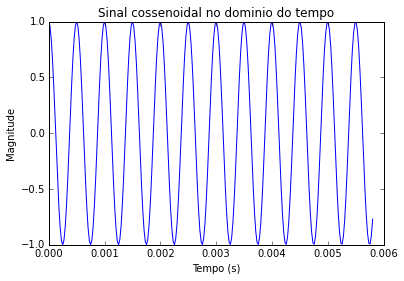

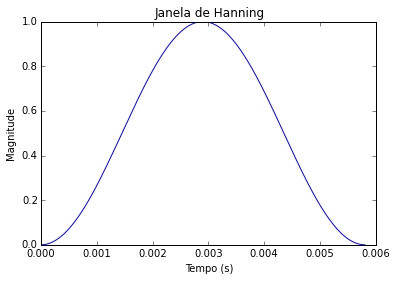

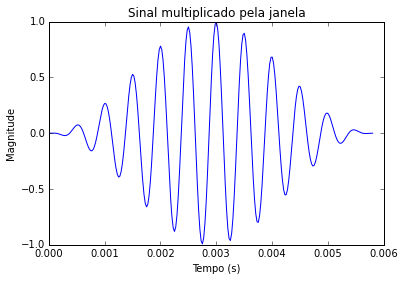

In [113]:
fs = 44100.
N = 256
zeros = 10 # O sinal recebera zeros ate atingir o tamanho zeros * N
f0 = 2000

t = np.linspace(0, N/fs, N)
x = np.cos(2 * np.pi * f0 * t)

N = 256

w = np.hanning(N)

plt.plot(t, x)
plt.xlabel('Tempo (s)')
plt.ylabel('Magnitude')
plt.title('Sinal cossenoidal no dominio do tempo')
plt.show()

plt.plot(t, w)
plt.xlabel('Tempo (s)')
plt.ylabel('Magnitude')
plt.title('Janela de Hanning')
plt.show()

plt.plot(t, x*w)
plt.xlabel('Tempo (s)')
plt.ylabel('Magnitude')
plt.title('Sinal multiplicado pela janela')
plt.show()

Abaixo, verificamos o efeito da aplicação da janela de Hanning nos lóbulos observados na TDF:

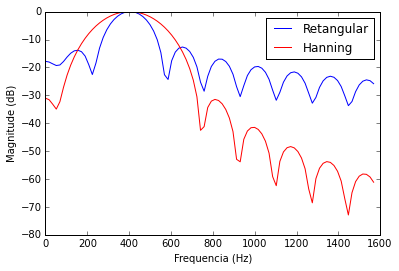

In [114]:
# Este codigo sobrepoe as variaveis definidas acima. Para voltar, sera preciso rodar tudo novamente.

fs = 44100.
N = 256
zeros = 10 # O sinal recebera zeros ate atingir o tamanho zeros * N
f0 = 400

t = np.linspace(0, N/fs, N)
x = np.cos(2 * np.pi * f0 * t)

# Processo da janela de Hanning
w = np.hanning(N)
xw = x * w

y = np.fft.fft(x, N*zeros) # A janela retangular eh definida implicitamente, neste caso.
yw = np.fft.fft(xw, N*zeros)

freq = np.linspace(0, fs, len(y))

fmax = 1600.
fmin = 000.

kmax = int(fmax * len(y)/fs)
kmin = int(fmin * len(y)/fs)

# Escala logaritmica no dominio da frequencia
y = y/np.max(np.abs(y))
y = 20 * np.log10(np.abs(y)) # a magnitude sera expressa em dB, onde 0dB eh o maximo valor da magnitude

yw = yw/np.max(np.abs(yw))
yw = 20 * np.log10(np.abs(yw)) # a magnitude sera expressa em dB, onde 0dB eh o maximo valor da magnitude


plt.plot(freq[kmin:kmax], y[kmin:kmax], label='Retangular')
plt.plot(freq[kmin:kmax], yw[kmin:kmax], 'r', label='Hanning')
plt.xlabel('Frequencia (Hz)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.show()

Assim, demonstramos que a janela de Hanning permite um decaimento maior dos lóbulos adjacentes, ao custo de uma largura maior do lóbulo central.

## Compromisso de resoluções tempo-frequência

Os experimentos que conduzimos até aqui mostram que:
1. Ao tomar janelas menores no domínio do tempo, aumentamos a resolução no domínio do tempo e, ao mesmo tempo, diminuímos a resolução no domínio da frequência;
1. Ao tomar janelas maiores no domínio do tempo, aumentamos a resolução no domínio da frequência, com a desvantagem de reduzir a resolução no domínio do tempo.

Essa relação se chama *compromisso de resoluções entre o tempo e a frequência*.


# Exercícios

1. Modifique o código relacionado à geração de um sinal dado pela soma de cossenóides ponderadas de forma a adicionar, a cada senóide, uma componente de fase. Analise as diferenças e semelhanças observáveis nos domínios do tempo e da frequência (quais grandezas físicas permanecem iguais? quais são modificadas?)
1. Modifique o código relacionado à geração de lóbulos espectrais de janelas retangulares e de Hanning, das seguintes formas:
 1. Qual é o menor tamanho $N$ de janela no domínio do tempo (em amostras), tal que $N$ é uma potência de $2$, que faz com que o lóbulo central da janela de Hanning se afaste, no máximo, 100 Hz à partir de seu ponto de máximo?
 1. Esse valor de $N$ corresponde a quantos segundos?
 1. Repita o experimento para afastamentos de 200 Hz, 50 Hz, 25 Hz. É possível traçar uma relação entre o valor de $N$ e a abertura observada?
1. Modifique o código relacionado à geração de lóbulos espectrais de janelas retangulares e de Hanning de forma utilizar como base um sinal que é a soma de dois sinais cossenoidais de mesma amplitude. Modifique os demais parâmetros do desenho de tal forma que seja possível visualizar os dois lóbulos correspondentes.
 1. Modifique progressivamente as frequências dos sinais cossenoidais de forma que os lóbulos se aproximem. À partir de qual diferença de frequências torna-se impossível distinguir os dois sinais?
 1. Repita esse mesmo experimento para janelas com tamanhos correspondentes a todos os valores de $N$ que foram encontrados no exercício anterior. É possível traçar uma relação entre o valor de $N$ e a menor diferença de frequências observável?